# Exports of Animals

### imports and first treatments

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [93]:
# Read the data
df = pd.read_csv("all_exports.csv")
df.head()

,transport_date,transport_time,sender_id,recipient_country,num_animals,reporting_datetime
0,2012-05-31,1315,80,PL,349,2012-06-01 15:12:26
1,2012-05-31,1315,80,PL,299,2012-06-01 15:15:34
2,2012-05-29,800,288,BE,97,2012-06-04 10:15:57
3,2012-05-29,800,288,BE,24,2012-06-04 10:15:57
4,2012-05-31,800,288,FR,12,2012-06-04 10:15:57


In [94]:
df.dtypes

transport_date        object
transport_time         int64
sender_id              int64
recipient_country     object
num_animals            int64
reporting_datetime    object
dtype: object

In [95]:
#change type of data
df["transport_date"] = pd.to_datetime(df["transport_date"], errors='ignore')
df["reporting_datetime"] = pd.to_datetime(df["reporting_datetime"], errors='ignore')
df = df.loc[(df['transport_date'] >= '2012-01-01') & (df['transport_date'] < '2023-01-01')]

In [96]:
print(df.dtypes)
print(df.head())

transport_date        datetime64[ns]
transport_time                 int64
sender_id                      int64
recipient_country             object
num_animals                    int64
reporting_datetime    datetime64[ns]
dtype: object
  transport_date  transport_time  sender_id recipient_country  num_animals  \
0     2012-05-31            1315         80                PL          349   
1     2012-05-31            1315         80                PL          299   
2     2012-05-29             800        288                BE           97   
3     2012-05-29             800        288                BE           24   
4     2012-05-31             800        288                FR           12   

   reporting_datetime  
0 2012-06-01 15:12:26  
1 2012-06-01 15:15:34  
2 2012-06-04 10:15:57  
3 2012-06-04 10:15:57  
4 2012-06-04 10:15:57  


### Plot and visualization of the different keypoints of the dataset

In [97]:
#general info about the data
print("shape of the dataste",len(df))
print("number of countries where pigs are exported",df["recipient_country"].nunique())
print("countries : ", df["recipient_country"].unique())
print(" number of pigs exported", df["num_animals"].sum())
print("number of different transporters", df["sender_id"].nunique())

shape of the dataste 350393
number of countries where pigs are exported 64
countries :  ['PL' 'BE' 'FR' 'RU' 'DE' 'NL' 'IT' 'AT' 'SK' 'PA' 'ES' 'VN' 'RS' 'UA'
 'LV' 'MK' 'BG' 'CZ' 'HR' 'RO' 'LT' 'HU' 'BR' 'MD' 'BY' 'GE' 'FI' 'SE'
 'GB' 'BA' 'TW' 'IE' 'CN' 'MQ' 'BM' 'JP' 'OM' 'EC' 'SI' 'TH' 'GR' 'PT'
 'PH' 'MS' 'LA' 'GA' 'LU' 'NO' 'AM' 'MY' 'KR' 'MX' 'PE' 'AR' 'UG' 'EE'
 'KZ' 'MT' 'NG' 'CA' 'CO' 'VE' 'ME' 'XI']
 number of pigs exported 139881077
number of different transporters 990


/tmp/ipykernel_74045/1948591386.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub_df = df.groupby(pd.Grouper(key='transport_date', axis=0, freq='Y')).sum()


Text(0.5, 1.0, 'Number of pigs exported per year')

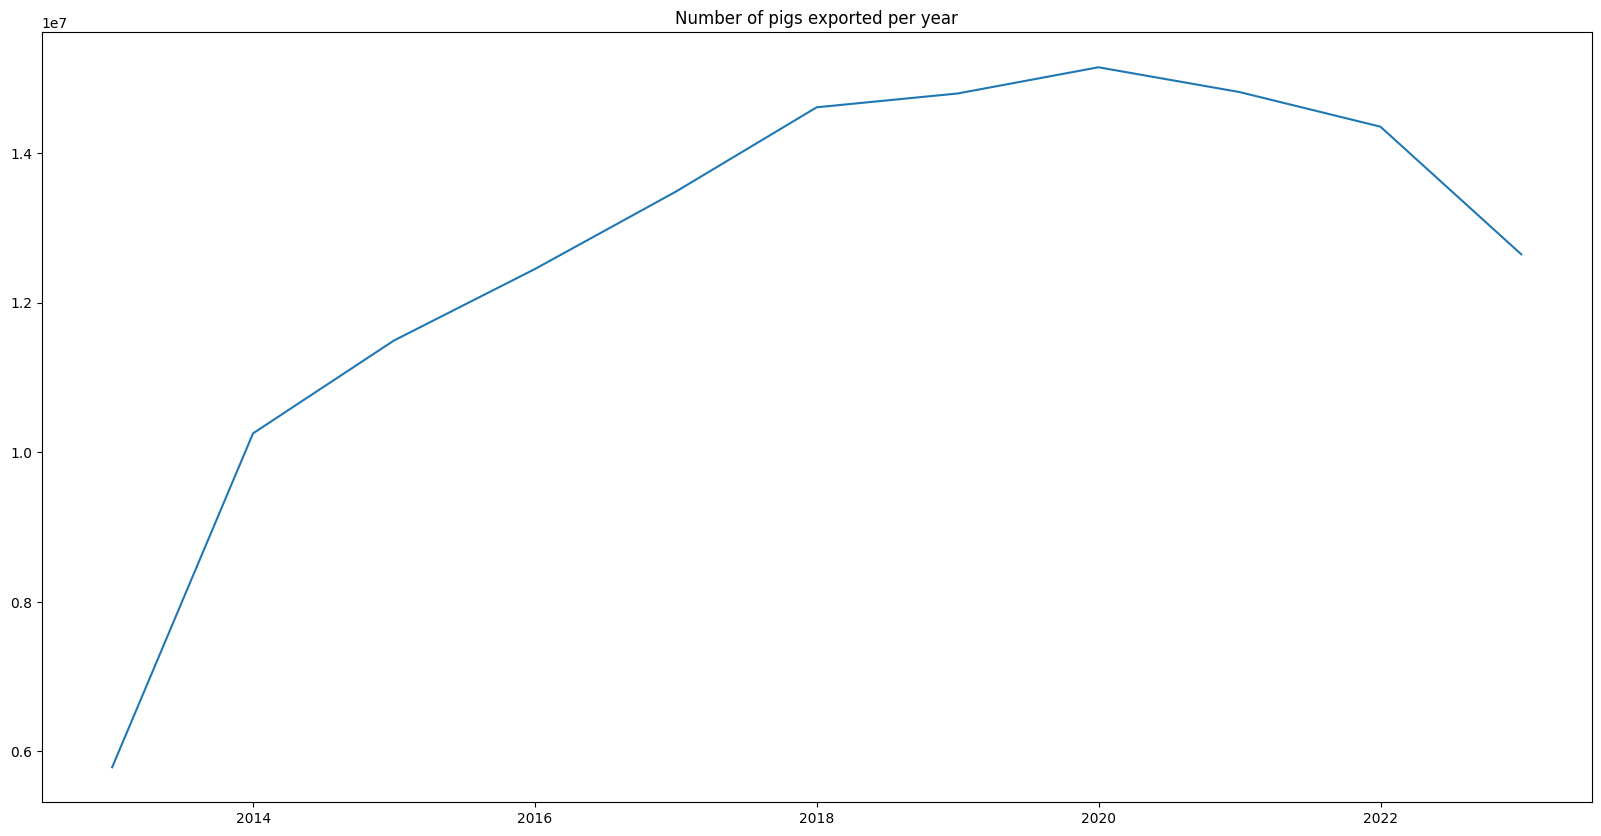

In [125]:
#export of pigs per year
fig = plt.figure(figsize=(20,10))
sub_df = df.groupby(pd.Grouper(key='transport_date', axis=0, freq='Y')).sum()
plt.plot(sub_df.index, sub_df["num_animals"])
plt.title("Number of pigs exported per year")

/tmp/ipykernel_74045/1841390130.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub_df = df.groupby(pd.Grouper(key='transport_date', axis=0, freq='M')).sum()


Text(0.5, 1.0, 'Number of pigs exported per month')

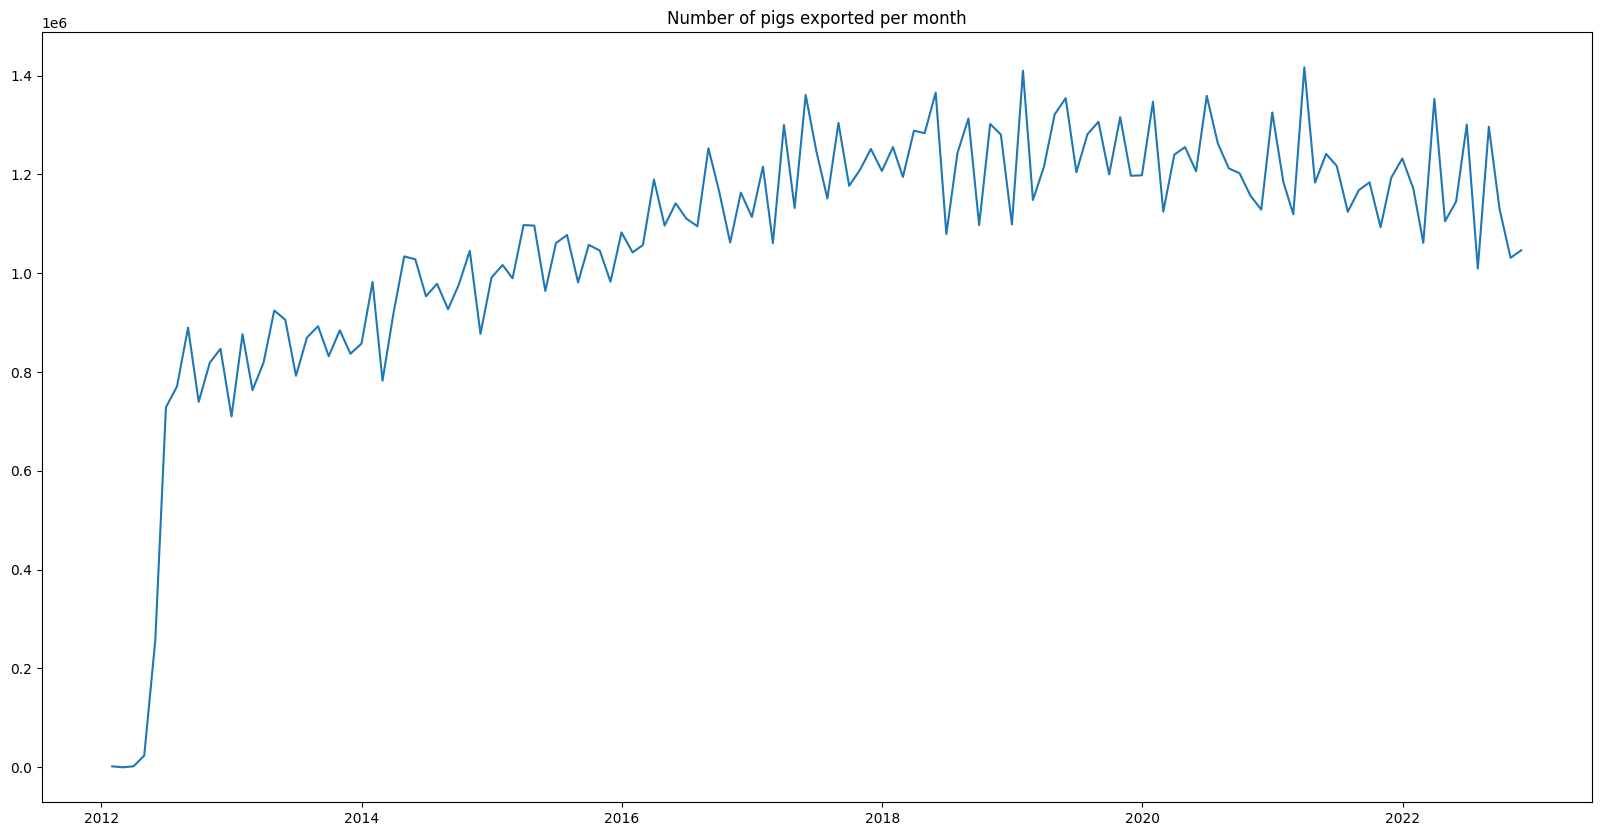

In [126]:
#export of pigs per month
fig = plt.figure(figsize=(20,10))
sub_df = df.groupby(pd.Grouper(key='transport_date', axis=0, freq='M')).sum()
plt.plot(sub_df.index, sub_df["num_animals"])
plt.title("Number of pigs exported per month")

/tmp/ipykernel_74045/3124620895.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub_df = df.groupby(pd.Grouper(key='transport_date', axis=0, freq='M')).sum()


Text(0.5, 1.0, 'Variation of the number of pigs exported per month')

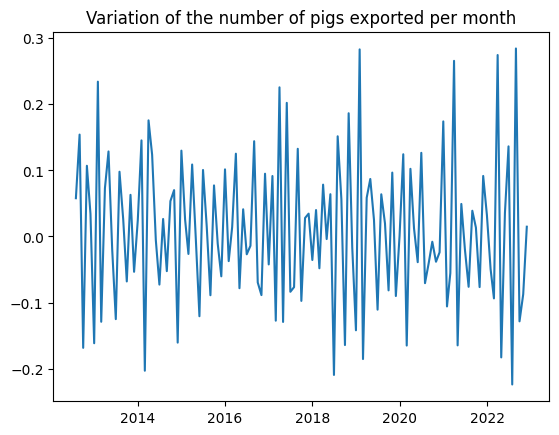

In [127]:
#varition of the number of pigs exported per month
sub_df = df.groupby(pd.Grouper(key='transport_date', axis=0, freq='M')).sum()
sub_df["variation"] = sub_df["num_animals"].pct_change().iloc[6:]
plt.plot(sub_df.index, sub_df["variation"], scaley=True)
plt.title("Variation of the number of pigs exported per month")

mean variation 0.009111865953881474 std variation 0.11265484246344518


/tmp/ipykernel_74045/112150802.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub_df = df.groupby(pd.Grouper(key='transport_date', axis=0, freq='M')).sum()


Text(0.5, 1.0, 'Variation of the number of pigs exported per month without the extreme values')

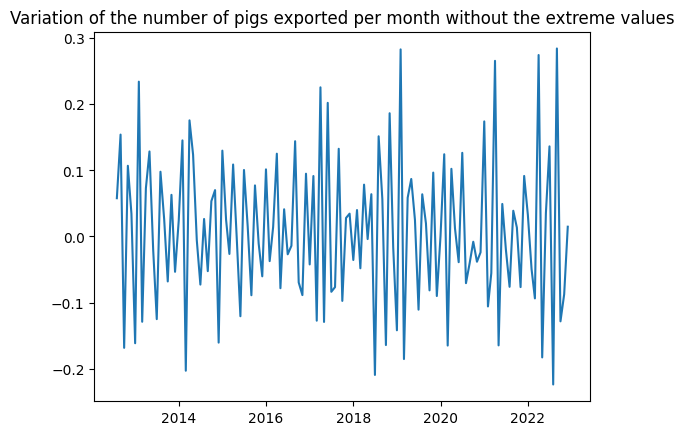

In [128]:
sub_df = df.groupby(pd.Grouper(key='transport_date', axis=0, freq='M')).sum()
sub_df["variation"] = sub_df["num_animals"].pct_change().iloc[6:]
plt.plot(sub_df.index, sub_df["variation"], scaley=True)
print("mean variation", sub_df["variation"].mean(), "std variation", sub_df["variation"].std())
plt.title("Variation of the number of pigs exported per month without the extreme values")

We can see that the variations are too small to show us a real increase in exports over time as shown in the graph of exports per month and per year.

/tmp/ipykernel_74045/1179894975.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub_df = df.groupby("recipient_country").sum()


<AxesSubplot: ylabel='num_animals'>

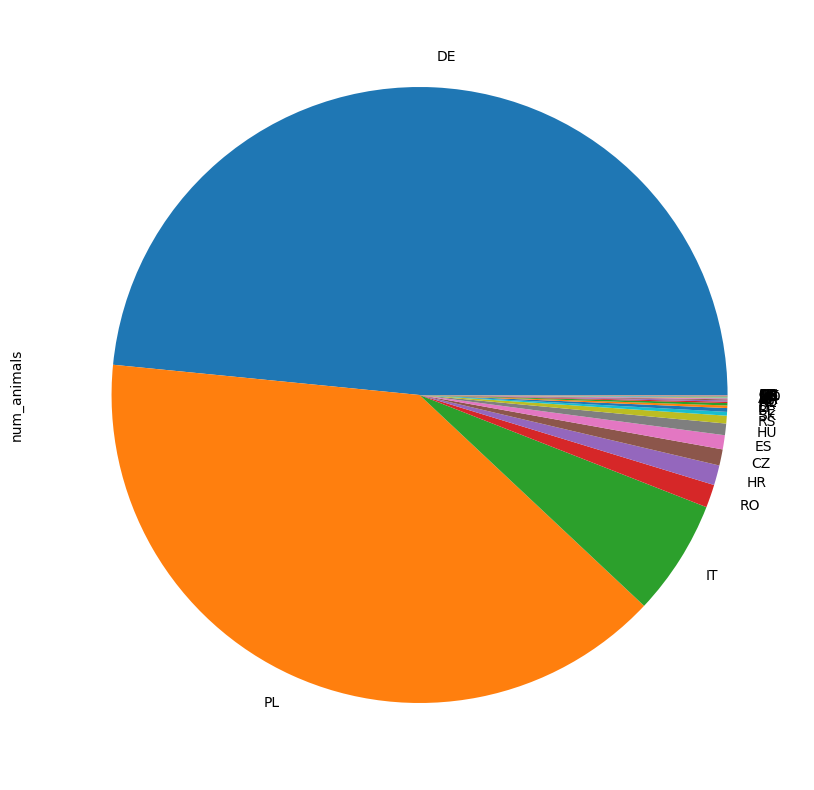

In [129]:
#export of pigs per country
sub_df = df.groupby("recipient_country").sum() 
sub_df = sub_df.sort_values(by="num_animals", ascending=False)
sub_df = sub_df[sub_df["num_animals"] > 10000]
sub_df["num_animals"].plot(kind='pie', figsize= (20,10))

We can see that export are mainly made with Deutschland and Poland which represent approximately 80% of the exports.